In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz

In [2]:
from IPython import display
display.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

/tmp/ipykernel_16381/3523346633.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # print figures in svg format


In [3]:
v = np.array([[1,2,3]]).T # col vector
w = np.array([[10,20]])   # row vector
v + w

array([[11, 21],
       [12, 22],
       [13, 23]])

# Visualizing matrices as images

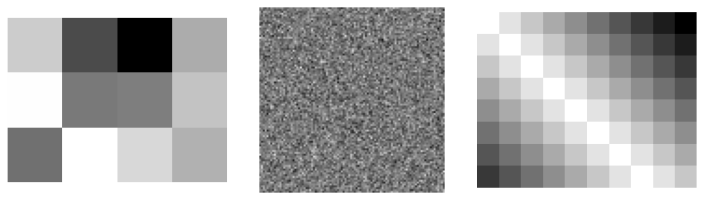

In [26]:
# create some matrices
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))


# and show them as images
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off')
plt.tight_layout()
plt.savefig('Figure_05_01.png',dpi=300)
plt.show()

# Slicing out rows and columns

In [5]:
# create a matrix
A = np.reshape(np.arange(1,10),(3,3))
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
# get the n-th row

print( A[1,:] )

# note that to extract only one row, you don't need the column indices. 
print( A[1] )
# But that's potentially confusing, so I recommend avoiding that notation.

[4 5 6]
[4 5 6]


In [7]:
# get the n-th column
print( A[:,1] )
# Note that it prints out as a "row" even thought it's a column of the matrix

[2 5 8]


In [8]:
# multiple rows
A[0:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
# multiple columns
A[:,1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [24]:
## extracting a submatrix (multiple rows and cols)

# The goal here is to extract a submatrix from matrix A. Here's A:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]

# And we want rows 0-1 and columns 0-1, thus:
# [[1 2]
#  [4 5]]


# seems like this should work...
print( A[0:2,1:2] )
print(' ')

# but this does (remember x:y:z slices from x to y-1 in steps of z)
print( A[0:2:1,0:2:1] )

[[ 1]
 [11]]
 
[[ 0  1]
 [10 11]]


In [23]:
# the full matrix
A = np.arange(60).reshape(6,10)

# a block of it
sub = A[1:4:1,0:5:1]


# print them out
print('Original matrix:\n')
print(A)

print('\n\nSubmatrix:\n')
print(sub)

Original matrix:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


Submatrix:

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


## special matrices

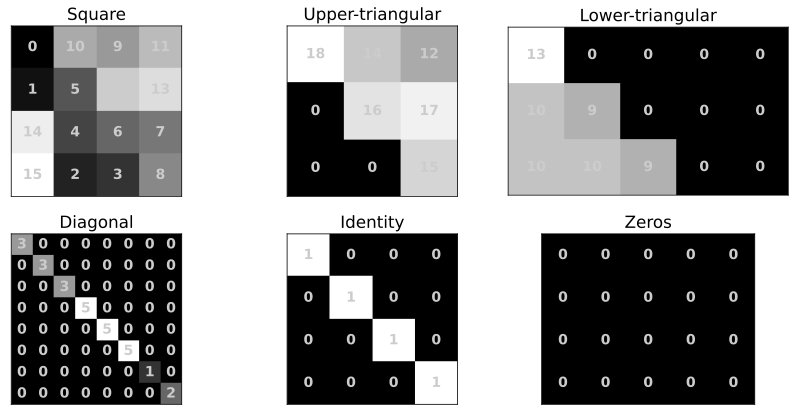

In [22]:
## create some matrices

# square
M1 = np.random.permutation(16).reshape(4,4)

# upper-triangular square
M2 = np.triu(np.random.randint(10,20,(3,3)))

# lower-triangular rectangular
M3 = np.tril(np.random.randint(8,16,(3,5)))

# diagonal
M4 = np.diag( np.random.randint(0,6,size=8) )

# identity
M5 = np.eye(4,dtype=int)

# zeros
M6 = np.zeros((4,5),dtype=int)

matrices  = [ M1,M2,M3,M4,M5,M6 ]
matLabels = [ 'Square','Upper-triangular','Lower-triangular','Diagonal','Identity','Zeros'  ]


_,axs = plt.subplots(2,3,figsize=(12,6))
axs = axs.flatten()

for mi,M in enumerate(matrices):
    axs[mi].imshow(M,cmap='gray',origin='upper',
                 vmin=np.min(M),vmax=np.max(M))
    axs[mi].set(xticks=[],yticks=[])
    axs[mi].set_title(matLabels[mi])
  
  # text labels
    for (j,i),num in np.ndenumerate(M):
        axs[mi].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontweight='bold')



plt.savefig('Figure_05_02.png',dpi=300)
plt.tight_layout()
plt.show()

#### more details about special matrices

In [13]:
# matrix size parameters (called 'shape' in Python lingo)
Mrows = 4 # shape 0
Ncols = 6 # shape 1

# create the matrix!
A = np.random.randn(Mrows,Ncols)

# print out the matrix (rounding to facilitate visual inspection)
np.round(A,3)

array([[ 0.285,  0.22 , -1.907,  1.423, -1.113,  1.149],
       [-0.82 ,  0.923,  1.47 ,  0.87 ,  0.203,  0.199],
       [-1.421,  0.829, -0.979, -0.36 , -0.38 , -0.777],
       [-0.154, -0.443,  0.258, -0.93 ,  1.318,  0.259]])

In [14]:
# Extract the triangular part of a dense matrix

M = 4
N = 6
A = np.random.randn(M,N)

# upper triangular
print('Upper triangular:\n')
print(np.triu(A))

# lower triangular
print('\n\nLower triangular:\n')
print(np.tril(A))

Upper triangular:

[[ 0.8078326   0.19541135  1.72543846 -0.48613229  0.73056037  2.66594168]
 [ 0.          1.14733004 -0.98086553 -1.59211259 -0.46360481  0.02284598]
 [ 0.          0.         -0.80279456 -1.7360347  -0.20712866  0.16465139]
 [ 0.          0.          0.          0.68137759  0.91372498 -0.82136472]]


Lower triangular:

[[ 0.8078326   0.          0.          0.          0.          0.        ]
 [-1.74703118  1.14733004  0.          0.          0.          0.        ]
 [ 0.22772006 -0.58463341 -0.80279456  0.          0.          0.        ]
 [ 0.57187957  0.56337553  0.2626948   0.68137759  0.          0.        ]]


In [15]:
# Diagonal

# input a matrix to get the diagonal elements
A = np.random.randn(5,5)
d = np.diag(A)
print('Input a matrix:\n',d)

# OR input a vector to create a diagonal matrix!
v = np.arange(1,6)
D = np.diag(v)
print('\n\nInput a vector:\n',D)

Input a matrix:
 [0.35176844 1.37872251 0.70940762 0.42729149 0.7276225 ]


Input a vector:
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


#### Identity and zeros matrices

In [27]:

n = 4
I = np.eye(n)
print(f'The {n}x{n} identity matrix:\n',I)

The 4x4 identity matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


#### Zeros matrix

In [28]:
# Important: All shape parameters are given as one input (a tuple or list),
#            unlike np.random.randn()
n = 4
m = 5
I = np.zeros((n,m))
print(f'The {n}x{m} zeros matrix:\n',I)

The 4x5 zeros matrix:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### Matrix addition


In [29]:
A = np.array([  [2,3,4],
                [1,2,4] ])

B = np.array([  [ 0, 3,1],
                [-1,-4,2] ])

print(A+B)

[[ 2  6  5]
 [ 0 -2  6]]
